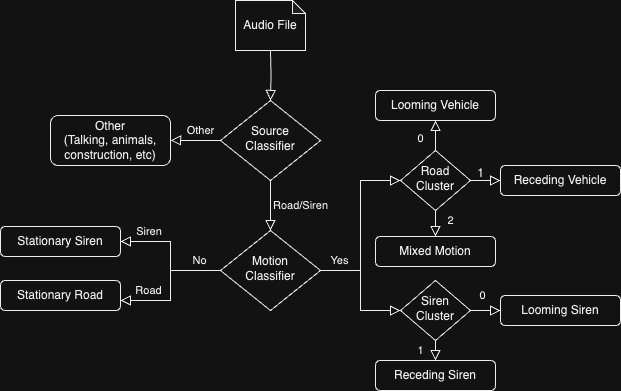

In [ ]:
import librosa
import numpy as np
from google.colab import drive
from sklearn.cluster import KMeans
from scipy import signal
import os
import shutil
from IPython.display import Audio, display
import ipywidgets as widgets
from IPython.display import clear_output

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
VA = '/content/drive/MyDrive/VehiclesInMotion/Ambulance data'
VR = '/content/drive/MyDrive/VehiclesInMotion/Road Noises'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to extract audio features
def extract_audio_features(audio_file):
    # Load audio file
    audio, sr = librosa.load(audio_file)

    # Normalize audio
    audio = librosa.util.normalize(audio)
    if len(audio)/sr < 4.0:
      return 0.1

    # Apply bandpass filter to isolate motion-related frequencies
    '''
    nyquist = sr / 2
    lowcut = 500   # Adjust this lower cutoff frequency based on your data
    highcut = 2500 # Adjust this higher cutoff frequency based on your data
    b, a = signal.butter(4, [lowcut/nyquist, highcut/nyquist], btype='band')
    filtered_audio = signal.lfilter(b, a, audio)'''

    # Extract pitch (fundamental frequency) from the filtered audio
    pitch = librosa.yin(audio, fmin=100, fmax=3000)

    return pitch

# Function to determine motion based on pitch changes
def determine_motion(audio_file):
    # Extract pitch (fundamental frequency)
    pitch = extract_audio_features(audio_file)

    audio, sr = librosa.load(audio_file)

    if len(audio)/sr < 4.0:
      return 'Stationary'

    # Normalize pitch
    pitch_normalized = librosa.util.normalize(pitch)

    # Analyze pitch changes
    pitch_diff = np.diff(pitch_normalized)

    # Take the absolute value of pitch differences
    pitch_diff_abs = np.abs(pitch_diff)

    #print(pitch_diff_abs)
    # Define motion criteria
    pitch_threshold = 0.9  # Adjust this threshold based on your data

    # Check for motion based on criteria
    if np.any(pitch_diff_abs > pitch_threshold):
        return "Motion Detected"
    else:
        return "Stationary"

In [ ]:
# Define the root directory containing the folders with audio files
root_dir = '/content/drive/My Drive/RoadSounds/'
# List of audio files detected for motion
audio_files_motion = []
# List the subdirectories (folders) within the root directory
sub_dirs = ['Ambulance data', 'Road Noises']
#Store number of files with motion
num = 0

# Iterate over the subdirectories and process the audio files
for sub_dir in sub_dirs:
    sub_dir_path = os.path.join(root_dir, sub_dir)
    audio_files = [file for file in os.listdir(sub_dir_path) if file.endswith('.wav')]

    # Iterate over the audio files
    for audio_file in audio_files:
        audio_file_path = os.path.join(sub_dir_path, audio_file)

        # Determine motion
        motion_result = determine_motion(audio_file_path)

        # Print the result
        if motion_result == "Motion Detected":
          num+=1
          audio_files_motion.append(audio_file_path)
          print(f"File: {audio_file_path} - Result: {motion_result}")
print(num)

In [ ]:
current_index = 0
input_path = audio_files_motion[current_index]
audio_viewer = ''
# Function to play audio and display the current index
def play_audio(file_path):
    audio_data, sr = librosa.load(file_path)
    global audio_viewer
    clear_output()
    audio_viewer = Audio(audio_data, rate=sr, autoplay=True)
    display(audio_viewer)
    print(f"Current Index: {current_index}/{len(audio_files_motion) - 1}")

    next_button = widgets.Button(description='Next')
    next_button.on_click(next_button_clicked)

    next_button_2 = widgets.Button(description='Skip 100')
    next_button_2.on_click(skip_100)

    button = widgets.Button(description='Copy to Google Drive')
    button.on_click(copy_file)
    display(next_button)
    display(button)
    display(next_button_2)

# Function to handle the next button click
def next_button_clicked(b):
    global current_index
    global input_path
    current_index = (current_index + 1)
    input_path = audio_files_motion[current_index]
    play_audio(audio_files_motion[current_index])

def skip_100(b):
    global current_index
    global input_path
    current_index = (current_index + 100)
    input_path = audio_files_motion[current_index]
    play_audio(audio_files_motion[current_index])

def copy_file(b):
  input_path_cut = input_path.replace("/content/drive/My Drive/RoadSounds/", "")
  shutil.copy(input_path, "/content/drive/My Drive/VehiclesInMotion/"+input_path_cut)
  print("/content/drive/My Drive/VehiclesInMotion/"+input_path_cut)


# Play the first audio file and display the button
play_audio(audio_files_motion[current_index])

In [ ]:
win_length = int(0.1*sr)    # desired window size of a signal say 0.1 sec
hop_length = int(0.5*win_length)  # desired hope length, 0.5 meaning overlapping by 50%
window='hann'          # window type, default is hanning
power = 2              # desired magniture of the spectrogram, 1.0 for energy and 2.0 for power
n_fft = sr//2  # desired number of samples in the frequency domain while performing fft
f_min = 20     # minimum frequency in Hz above which the mel-spectrogram has to be calculated
f_max = 1000   # maximum frequency in Hz below which the mel-spectrogram has to be calculated
pad_mode = "constant"
n_mels = 41    # number of mel-filter banks
n_mfcc = 41    # number of coefficients of dct
center = True


""" Using librosa library """
import librosa

mfcc = librosa.feature.mfcc(y=sig, sr=sr, n_mels = n_mels, n_mfcc=n_mfcc, win_length=win_length,
                            hop_length=hop_length, window=window, n_fft=n_fft, fmin=f_min, fmax=f_max,
                            center=center, power=power, dct_type=2, norm='ortho', lifter=0)


def extract_mfcc(audio_file, n_mfcc=13):
    y, sr = librosa.load(audio_file)
    win_length = int(0.1*sr)    # desired window size of a signal say 0.1 sec
    hop_length = int(0.5*win_length)  # desired hope length, 0.5 meaning overlapping by 50%
    window='hann'          # window type, default is hanning
    power = 2              # desired magniture of the spectrogram, 1.0 for energy and 2.0 for power
    n_fft = sr//2  # desired number of samples in the frequency domain while performing fft
    f_min = 400     # minimum frequency in Hz above which the mel-spectrogram has to be calculated
    f_max = 3000   # maximum frequency in Hz below which the mel-spectrogram has to be calculated
    pad_mode = "constant"
    n_mels = 41    # number of mel-filter banks
    n_mfcc = 41    # number of coefficients of dct
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mels = n_mels, n_mfcc=n_mfcc, win_length=win_length,
                            hop_length=hop_length, window=window, n_fft=n_fft, fmin=f_min, fmax=f_max,
                            center=center, power=power, dct_type=2, norm='ortho', lifter=0)
    return np.mean(mfccs, axis=1)

def preprocess_features(features):
    # Normalize features to have zero mean and unit variance
    return (features - np.mean(features, axis=0)) / np.std(features, axis=0)

def cluster_audio_files(audio_files, n_clusters, n_mfcc):
    features = []
    for file in audio_files:
        mfcc = extract_mfcc(file, n_mfcc)
        features.append(mfcc)

    # Preprocess the features
    X = preprocess_features(np.array(features))

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)

    # Create a dictionary to store cluster assignments for each file
    cluster_dict = {file: cluster for file, cluster in zip(audio_files, cluster_labels)}
    return cluster_dict

In [ ]:
audio_folder_path = VA
audio_files = [os.path.join(audio_folder_path, f) for f in os.listdir(audio_folder_path) if f.endswith(".wav")]

# Set the number of clusters (classes) to 2 since we want to separate them into two groups
num_clusters = 2

# Set the number of MFCC coefficients to extract (you can adjust this based on your needs)
num_mfcc = 25

# Cluster the audio files
clusters = cluster_audio_files(audio_files, n_clusters=num_clusters, n_mfcc=num_mfcc)

# Print the cluster assignments for each audio file
for file, cluster in clusters.items():
    print(f"File: {file}, Cluster: {cluster}")

File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance537.wav, Cluster: 1
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance543.wav, Cluster: 1
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance546.wav, Cluster: 1
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance10.wav, Cluster: 1
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance637.wav, Cluster: 0
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance636.wav, Cluster: 0
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance16.wav, Cluster: 0
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance15.wav, Cluster: 0
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance464.wav, Cluster: 0
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance124.wav, Cluster: 0
File: /content/drive/MyDrive/VehiclesInMotion/Ambulance data/ambulance119.wav, Cluster: 0
File: /conten

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
audio_folder_path = VR
audio_files = [os.path.join(audio_folder_path, f) for f in os.listdir(audio_folder_path) if f.endswith(".wav")]

# Set the number of clusters (classes) to 2 since we want to separate them into two groups
num_clusters = 3

# Set the number of MFCC coefficients to extract (you can adjust this based on your needs)
num_mfcc = 25

# Cluster the audio files
clusters = cluster_audio_files(audio_files, n_clusters=num_clusters, n_mfcc=num_mfcc)

# Print the cluster assignments for each audio file
for file, cluster in clusters.items():
    print(f"File: {file}, Cluster: {cluster}")

File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road111.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road4.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road499.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road461.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road485.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road495.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road483.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road470.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road465.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road469.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road481.wav, Cluster: 2
File: /content/drive/MyDrive/VehiclesInMotion/Road Noises/road473.wav, Cluster: 2
File: /content/dri

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_0_files = [file for file, cluster in clusters.items() if cluster == 0]
cluster_1_files = [file for file, cluster in clusters.items() if cluster == 1]

audio_files_motion = cluster_1_files
current_index = 0
input_path = audio_files_motion[current_index]
audio_viewer = ''


w = widgets.RadioButtons(
    options=['1st Label', '2nd Label'],
    value='1st Label',
    description='Cluster:',
)

def on_change(change):
    global audio_files_motion
    #if change['type'] == 'change' and change['name'] == 'value':
    #    print("changed to %s" % change['new'])
    if audio_files_motion == cluster_1_files:
      audio_files_motion = cluster_0_files
    else:
      audio_files_motion = cluster_1_files

# Function to play audio and display the current index
def play_audio(file_path):
    audio_data, sr = librosa.load(file_path)
    global audio_viewer
    clear_output()
    audio_viewer = Audio(audio_data, rate=sr, autoplay=True)
    display(audio_viewer)
    print(f"Current Index: {current_index}/{len(audio_files_motion) - 1}")

    next_button = widgets.Button(description='Next')
    next_button.on_click(next_button_clicked)

    next_button_2 = widgets.Button(description='Skip 10')
    next_button_2.on_click(skip_10)
    w.observe(on_change)

    display(w)
    display(next_button)
    display(next_button_2)

# Function to handle the next button click
def next_button_clicked(b):
    global current_index
    global input_path
    current_index = (current_index + 1)
    input_path = audio_files_motion[current_index]
    play_audio(audio_files_motion[current_index])

def skip_10(b):
    global current_index
    global input_path
    current_index = (current_index + 10)
    input_path = audio_files_motion[current_index]
    play_audio(audio_files_motion[current_index])


# Play the first audio file and display the button
play_audio(audio_files_motion[current_index])

Current Index: 1/27


RadioButtons(description='Cluster:', index=1, options=('1st Label', '2nd Label'), value='2nd Label')

Button(description='Next', style=ButtonStyle())

Button(description='Skip 10', style=ButtonStyle())

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import glob
from keras.utils import pad_sequences

'''
    win_length = int(0.1*sr)    # desired window size of a signal say 0.1 sec
    hop_length = int(0.5*win_length)  # desired hope length, 0.5 meaning overlapping by 50%
    window='hann'          # window type, default is hanning
    power = 2              # desired magniture of the spectrogram, 1.0 for energy and 2.0 for power
    n_fft = sr//2  # desired number of samples in the frequency domain while performing fft
    f_min = 20     # minimum frequency in Hz above which the mel-spectrogram has to be calculated
    f_max = 1000   # maximum frequency in Hz below which the mel-spectrogram has to be calculated
    pad_mode = "constant"
    n_mels = 41    # number of mel-filter banks
    n_mfcc = 41    # number of coefficients of dct
    center = True
'''

X = []
y = []

# Step 2: Load audio data and extract MFCC features
def extract_mfcc_features(audio_file, n_mfcc=13):
    y, sr = librosa.load(audio_file)  # Load audio file

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=25)
    return mfccs

# Step 3: Prepare the dataset
def prepare_dataset(file_paths, n_mfcc=13):
    global X
    global y
    n =0
    max_length = 0
    for file_path in file_paths:
        print(n)
        n+=1
        label = 0 if 'l' in os.path.basename(file_path) else 1
        mfccs = extract_mfcc_features(file_path, n_mfcc)
        print(mfccs.shape)
        X.append(mfccs)
        y.append(label)

        if mfccs.shape[1] > max_length:
            max_length = mfccs.shape[1]
    X_padded = []
    for mfccs in X:
        pad_width = max_length - mfccs.shape[1]
        mfccs_padded = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        X_padded.append(mfccs_padded)

    X_padded = np.array(X_padded)
    X = np.array(X_padded)
    y = np.array(y)

# Step 4: Load and prepare data
data_dir = "/content/drive/MyDrive/VehiclesInMotion/Ambulance data/*.wav"
file_paths = glob.glob(data_dir)
prepare_dataset(file_paths)

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Reshape data for CNN
n_mfcc = 25
input_shape = (X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.reshape(X_train.shape[0], *input_shape)
X_test = X_test.reshape(X_test.shape[0], *input_shape)

0
(25, 383)
1
(25, 453)
2
(25, 353)
3
(25, 608)
4
(25, 593)
5
(25, 447)
6
(25, 326)
7
(25, 611)
8
(25, 429)
9
(25, 343)
10
(25, 407)
11
(25, 390)
12
(25, 382)
13
(25, 212)
14
(25, 401)
15
(25, 326)
16
(25, 343)
17
(25, 403)
18
(25, 388)
19
(25, 651)
20
(25, 782)
21
(25, 465)
22
(25, 130)
23
(25, 353)
24
(25, 453)
25
(25, 540)
26
(25, 473)
27
(25, 573)
28
(25, 469)
29
(25, 485)


In [ ]:

model = []
# Step 7: Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 8: Train the CNN model
model.fit(X_train, y_train, epochs=15)



Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 3.7982 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 392ms/step - loss: 80.7599 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 400ms/step - loss: 122.8606 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 440ms/step - loss: 133.9638 - accuracy: 0.5417
Epoch 5/15
1/1 [==============================] - 0s 412ms/step - loss: 43.4542 - accuracy: 0.5833
Epoch 6/15
1/1 [==============================] - 0s 397ms/step - loss: 59.7895 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 400ms/step - loss: 71.1445 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 386ms/step - loss: 41.8232 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 406ms/step - loss: 36.2146 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 396ms/step - loss: 53.6889 - accuracy: 0.6667
Epoch 11/15

In [ ]:
# Step 9: Evaluate the CNN model
y_pred_prob = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary predictions

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 101ms/step
Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

